# 模型学习——回归模型

# 0. 漫谈回归与线性回归模型

## 0.1 回归的本质是什么？

我们在前面介绍监督学习的两大任务（分类与回归）的时候曾提到，回归任务研究的内容是：当因变量$y$为连续定量变量时，因变量$Y$将随自变量$X$的变化发生怎样的变化，即在给定自变量$X=x$的条件下，我们需要输出$Y$的预测值。问题来了，这个预测出来的$Y$值究竟是什么东西呢？是自变量已知条件下因变量的“精确值”吗？现在让我们追根溯源，看看“回归”究竟是什么意思。

回归这个概念是19世纪80年代由英国统计学家郎西斯.高尔顿在研究父子身高关系提出来的，他发现：在同一族群中，子代的平均身高介于父代的身高以及族群的平均身高之间。具体而言，高个子父亲的儿子的身高有低于其父亲身高的趋势，而矮个子父亲的儿子身高则有高于父亲的身高的趋势。也就是说，子代的身高有向族群平均身高"平均"的趋势，这就是统计学上"回归"的最初含义。

这意味着，回归任务中因变量$Y$实际上预测的是一种均值，准确来说是$X$已知下的条件均值，而非精确值。举个例子，假设现在有一个“真实”的回归模型$f(X)$可以根据各种指标推测人的身高，小明输入了这些指标$X=x$，并得到了身高预测值$y=f(x)=170$。事实上，这个170并不是说模型认为在这些指标下小明的身高就是精确的170，而是在这些指标下大家的身高均值是170。小明实际身高既可能高于170，也可能低于170，但是基本上具备小明这样身体条件的人的身高基本上就在170附近浮动。

看完上面这个例子，相信大家就不难理解回归建模的本质是什么了——回归建模本质上就是条件均值的建模，其模型范式可以进行如下改写：
$$
Y=f(X)+u=E(Y|X)+u
$$
其中，$u$被称为随机误差，可理解为：除$X$外，其他影响$Y$的因素。代入到上面的例子中，假设小明真实的身高为$y=172$，而真模型$f(x)=170$，那么小明的身高随机误差就为$u=2$。

## 0.2 线性回归模型

我们在前面的学习中明白了回归问题的模型输出值$f(X)$本质是条件均值$E(Y|X)$，接下来就是对模型的形式$f(X)$进行假定了。在所有回归模型假定形式中，线性回归模型是最常用假定形式：
$$
f\left( X \right) =\beta _0+\beta _1X^{\left( 1 \right)}+\cdots +\beta _pX^{\left( p \right)}
$$
线性回归模型假设因变量$Y$与自变量$X$存在完全线性的关系。如果两者之间确实存在，则模型的效果将非常好；若部分自变量与因变量的关系并非完全的线性，我们也可以采用诸如二次项化、对数化等方式对模型进行拓展，这些内容将在后续展开。

在这里，我们将$f(X)$定义为一个“真模型”，它是模型在参数空间中的最佳表现，是**理论上**最完美的模型。当然，在回归分析中，$f(X)$有一个专属的名称：**总体回归直线**，它是对$X$与$Y$之间的真实关系的最佳线性拟合。

然而，总体回归直线在现实中是不可能被观测出来的，我们只能通过各种方法，**根据样本**得出一个“训练模型”。通常地，我们记训练出来的模型为$\hat{f}(X)$，并使用$\hat{f}(X)$执行预测任务，记预测值为$\hat{y}=\hat{f}(X)$。在回归分析中，$\hat{f}(X)$也有一个专属的名称：**样本回归直线**，记为：
$$
\hat{f}\left( X \right) =\hat{\beta}_0+\hat{\beta}_1X^{\left( 1 \right)}+\cdots +\hat{\beta}_pX^{\left( p \right)}
$$
其中，$\hat{\beta}_i$是对$\beta_i$的估计，这也是我们在本次机器学习回归篇重点探讨的一个内容——既然现在机器学习三要素的第一要素“模型”已经被定义为了线性模型，那么接下来我们要采用何种策略去训练它，从而得到对模型系数$\beta_i$的估计$\hat{\beta}_i$呢？我们将在本篇学习中介绍三种训练的策略，这三种策略分别对应着三个机器学习算法：
1. 最小二乘线性回归
2. Ridge回归
3. Lasso回归

## 0.3 为什么要学习线性回归

**· 线性回归是许多新方法的基础**

相信有不少对机器学习有一定了解的同学都或多或少有这样的想法：现在人工智能这么发达，各种高性能高精度的深度学习、机器学习算法日新月异，线性回归模型不是早就out了吗？笔者一开始学习的时候也有这样的想法，但事实上，线性回归仍是一种有效并得到广泛应用的统计学习方法，且当前以回归作为机器学习任务的问题，大多都借助线性回归模型的框架解决之。

为了解决标准线性回归模型预测能力不足的问题，出现了许多以线性回归模型为基本框架的新模型，如：回归样条、局部回归、广义可加模型等等，而深入学习这些算法的前提都是学好线性回归。

**· 线性回归具备强大的解释与推断能力**

我们在机器学习入门篇中提到过，机器学习的两个主要任务是预测与分析，若执行分析任务，我们就需要模型具备良好的可解释性，而线性回归是所有机器学习模型中解释能力最强的一类模型之一。

一方面，线性模型的形式非常易于我们对因变量与自变量间的相关关系进行分析。例如，当研究营销收入$y$与诸如电视、广播、报纸等广告投入的关系时，我们可以通过生成的下述模型：
$$
sale=\beta _0+\beta _1TV+\beta _2radio+\beta _3newspaper+u
$$
直观地看出哪种广告投入最有利于营销收入，哪种广告投入相对疲软，从而做出策略上的调整。


另一方面，当前统计学家对线性回归的研究非常透彻，在一定的统计假设下，我们可以轻松地对模型参数进行各种统计推断，这是许多具备强大预测能力但是过程难以观测与解释的模型（我们称这样的模型为“黑盒模型”）不具备的强大优势。

## 0.4 教学侧重

本次教学侧重介绍三种经典线性回归算法——最小二乘回归、Lasso回归、Ridge回归的基本原理（训练策略）与背后的思想，以及算法的优劣与应用场景，并基于python的sklearn库进行代码实操。

当前，实现在python中实现线性回归的两个主要的库为sklearn与statsmodels。sklearn中的线性回归更“机器学习”一点，它的接口设置与sklearn中其它机器学习算法的设置相对统一，主要侧重于“预测”，较为轻便实用，但是它基本没有统计推断的功能；statsmodels则是python中专门做统计分析任务的库，各种统计推断功能一应俱全，如果我们想做深入的回归分析，则可以使用statsmodels。

# 1. 最小二乘线性回归

## 1.1 最小二乘线性回归的思想与原理

在前言章节，我们了解了回归的本质——条件均值建模、介绍了最经典的回归模型——线性回归模型的假定形式。那么接下来的问题是——我们应该采取怎样的策略训练出这些模型参数，而这些策略背后的思想又是什么呢？在这一章，我们学习线性回归中最常用的系数估计方法——普通最小二乘估计法(Ordinary Least Squares, OLS)。

### 1.1.1 OLS的思想

我们用一个关于储蓄与收入间关系的例子解释ols估计的思想。将储蓄savings视作因变量$y$，将收入income视作自变量$x$，由于只有一个自变量，因此可以用只带有一个自变量的线性回归模型假设两者关系为$y=\beta_{0}+\beta_{1} x+u$，即一条带有趋势与截距的直线。那么，这条直线应该“长成”怎样才算是一条“好的直线”呢？直观上看，最佳的拟合直线应该尽可能的贴合样本点，如下图所示

<img src='./images/ols.png'>

直线尽可能贴合样本点，意味着在所有直线当中，我们要选出一条离所有样本点距离的总和最小的直线。那么，这个距离该如何衡量？我们定义训练模型为
$$
\hat{f}\left( x_i \right) =\hat{\beta}_0+\hat{\beta}_1x_{i}^{\left( 1 \right)}
$$
并记样本$\left( x_i,y_i \right) $的实际观测值$y_i$与模型拟合值$\hat{f}\left( x_i \right) $之差为拟合残差$
\hat{u}_{i}=y_i-\hat{f}\left( x_i \right) $。

在回归任务中，我们通常使用残差的平方$\hat{u}_{i}^{2}$定义样本$\left( x_i,y_i \right) $与模型的距离，因此最小二乘(OLS)线性回归算法训练模型的思想是：**训练的模型$\hat{f}\left( x_i \right) $将使所有样本点的残差平方和最小。**

在本例中，我们可以用以下公式表达该思想：
$$
\left( \hat{\beta}_0,\hat{\beta}_1 \right) =\mathrm{arg}\min \sum_{i=1}^n{\left( y_i-\hat{\beta}_0-\hat{\beta}_1x_{i}^{\left( 1 \right)} \right) ^2}
$$


### 1.1.2 最小二乘回归的训练策略

理解了最小二乘回归的基本思想，接下来我们就看看如何用机器学习三要素中的“策略”去诠释这种思想。

**· 符号设定**

给定一组训练数据集
$$
T=\left\{\left(x_1, y_1\right),\left(x_2, y_2\right), \cdots,\left(x_N, y_N\right)\right\}
$$

其中，$x_i=\left(x_i^{(1)}, x_i^{(2)}, \cdots, x_i^{(n)}\right)^{\mathrm{T}} , y_i \in R$

我们将线性回归模型重写为如下的向量表达式：
$$
f\left( x \right) =\beta _0+\beta _1x^{\left( 1 \right)}+\cdots +\beta _nx^{\left( n \right)}=wx+b
$$
其中，$w=\left( \beta _1,\cdots ,\beta _n \right) $是系数向量，$b=\beta_0$是截距。

**· 损失函数**

我们在前面提到的样本点到模型超平面（若自变量只有一维则是直线）的距离，本质上就是损失函数。显然，用残差的平方定义距离实质上就是将损失函数定义为平方损失函数：
$$
L(y,f(x)=(y-f(x))^2=\left( wx+b-y \right) ^2
$$

**· 最小化经验风险函数**

将所有样本点的损失函数值相加，就得到了风险函数：
$$
R_{\mathrm{emp}}(f)=\sum_{i=1}^N{L}\left( y_i,f\left( x_i \right) \right) =\sum_{i=1}^N{\left( wx_i+b-y_i \right) ^2}
$$

最后，采取令经验风险函数最小化的策略：
$$
\left( w^*,b^* \right) =\mathrm{arg}\min \sum_{i=1}^N{\left( wx_i+b-y_i \right) ^2}
$$
所得到的$w^*$，$b^*$就是线性回归模型基于普通最小二乘法OLS训练得到的模型系数。注意到，这里的经验风险函数相比于入门篇中的经验风险函数少乘了一个$1/N$，这是因为对于一个最优化任务而言，少乘一个常数对结果没有任何影响。

值得一提的是，最小二乘线性回归采取的是最小化经验风险而非结构风险，也就是说这个算法并不考虑对正则项的加入，而有关对线性回归正则化的讨论，我们将在Lasso回归与Ridge回归中看到。


### 1.1.3 浅析最小二乘回归的算法

线性回归模型是线性加法模型，最小化问题的求解思路一般都是先求风险函数对各系数的一阶导数，并令它们等于0，从而得到一组方程组，然后将问题转化为求解方程组。

我们先基于上述风险函数分别对$w$与$b$求一阶导数并令导数为0：
$$
\begin{aligned}
	\frac{\partial L(w,b)}{\partial \beta _j}&=\frac{\partial}{\partial \beta _j}\left[ \sum_{i=1}^N{\left( wx_i+b-y_i \right) ^2} \right]\\
	&=\sum_{i=1}^N{\frac{\partial}{\partial \beta _j}}\left[ \left( y_i-wx_i-b \right) ^2 \right]\\
	&=\sum_{i=1}^N{\left[ 2\cdot \left( y_i-wx_i-b \right) \cdot \left( -x_{i}^{\left( j \right)} \right) \right]}=0\\
\end{aligned}
$$
其中，$j=1,2,\cdots ,n$。

$$
\begin{aligned}
	\frac{\partial L(w,b)}{\partial b}&=\frac{\partial}{\partial b}\left[ \sum_{i=1}^N{\left( wx_i+b-y_i \right) ^2} \right]\\
	&=\sum_{i=1}^N{\frac{\partial}{\partial b}}\left[ \left( y_i-wx_i-b \right) ^2 \right]\\
	&=\sum_{i=1}^N{\left[ 2\cdot \left( y_i-wx_i-b \right) \cdot (-1) \right]}=0\\
\end{aligned}
$$
此时，对于$\beta _0,\cdots ,\beta _n$这$n+1$个未知参数，我们有$n+1$个等式：
$$
\begin{aligned}
	&\sum_{i=1}^N{\left( y_i-\hat{\beta}_0-\hat{\beta}_1x_{i}^{\left( 1 \right)}-\cdots -\hat{\beta}_nx_{i}^{\left( n \right)} \right)}=0\\
	&\sum_{i=1}^N{\left( y_i-\hat{\beta}_0-\hat{\beta}_1x_{i}^{\left( 1 \right)}-\cdots -\hat{\beta}_nx_{i}^{\left( n \right)} \right)}x_{i}^{\left( 1 \right)}=0\\
	&\sum_{i=1}^N{\left( y_i-\hat{\beta}_0-\hat{\beta}_1x_{i}^{\left( 1 \right)}-\cdots -\hat{\beta}_nx_{i}^{\left( n \right)} \right)}x_{i}^{\left( 2 \right)}=0\\
	&\cdots \quad \cdots\\
	&\sum_{i=1}^N{\left( y_i-\hat{\beta}_0-\hat{\beta}_1x_{i}^{\left( 1 \right)}-\cdots -\hat{\beta}_nx_{i}^{\left( n \right)} \right)}x_{i}^{\left( n \right)}=0\\
\end{aligned}
$$
因此利用方程组求解的知识进行参数求解，即可求得$\left( w^*,b^* \right)$即$(\hat{\beta}_{0}, \hat{\beta}_{1}, \cdots, \hat{\beta}_{k})$的唯一解了。

## 1.2 基于sklearn的最小二乘回归实操

在这一节，我们将学习如何使用sklearn中的api实现最小二乘回归，并介绍api中常用的方法实现模型拟合指标查看、拟合系数查看等功能，帮助大家快速上手最小二乘回归的python建模。

### 1.2.1 Boston数据集

在数据集的选择上，我们选用机器学习中一个较为常用的数据集：Boston房价数据集，里面包含13个自变量，以及一个连续因变量$price$，是一个非常经典的回归任务数据集。数据集各个特征的解释如下：
   - CRIM：各城镇的人均犯罪率
   - ZN：规划地段超过25,000平方英尺的住宅用地比例
   - INDUS：城镇非零售商业用地比例
   - CHAS：是否在查尔斯河边(=1是)
   - NOX：一氧化氮浓度(/千万分之一)
   - RM：每个住宅的平均房间数
   - AGE：1940年以前建造的自住房屋的比例
   - DIS：到波士顿五个就业中心的加权距离
   - RAD：放射状公路的可达性指数
   - TAX：全部价值的房产税率(每1万美元)
   - PTRATIO：按城镇分配的学生与教师比例
   - B：1000(Bk - 0.63)^2其中Bk是每个城镇的黑人比例
   - LSTAT：较低地位人口
   - Price：房价

我们现在开始载入Boston数据集。注意：可能是由于版权原因，sklearn可能会在后续版本移除Boston数据集，且现在直接使用load_boston()会出现很长的warning，因此我们采用以下指令载入Boston数据集。

In [4]:
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
# 原来的载入方式
# boston = datasets.load_boston() 
# X = boston.data
# y = boston.target
# features = boston.feature_names
# boston_data = pd.DataFrame(X,columns=features)
# boston_data["Price"] = y

# 新载入方式
boston_url="http://lib.stat.cmu.edu/datasets/boston"
raw_df=pd.read_csv(boston_url, sep="\s+", skiprows=22, header=None)
X=np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y=raw_df.values[1::2, 2]
features=['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']
boston_data = pd.DataFrame(X,columns=features)
boston_data["Price"] = y
boston_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 1.2.2 模型的训练与方法

**· 数据集划分**

在训练模型之前，需要先划分数据集。训练集与测试集的划分永远是机器学习必须做的一件事！

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

**· 模型训练与预测**

最小二乘线性回归的api封装在sklearn.linear_model模块，该api的文档指引地址为：

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [7]:
from sklearn.linear_model import LinearRegression

# 训练模型
lr=LinearRegression() # 将最小二乘线性回归算法的类实例化
lr.fit(X_train,y_train) # 用训练集数据进行训练

# 模型预测
X_lr_pred=lr.predict(X_test)


**· 参数与指标的输出**

模型训练完成后，我们肯定想知道模型“长啥样”，模型效果如何。LinearRegression提供了一些基础的方法api帮助我们更好地了解模型。首先是模型参数的查看，在线性回归中，这些参数就是截距以及自变量的系数。

In [8]:
# 截距
print('模型的截距为：{:.2f}'.format(lr.intercept_)) # 保留两位小数

# 自变量系数
print('模型的系数为：\n{}'.format(lr.coef_)) 

模型的截距为：36.93
模型的系数为：
[-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]


这些系数的顺序对应我们的训练数据集X_train中的自变量特征的顺序，如-0.11478591是特征crim的系数。

接下来我们将目光放在模型性能的衡量指标上。在sklearn中，每一种机器学习方法的api都会有一个直接输出模型在特定的数据集中性能指标的方法：score()。对于分类机器学习算法而言，score一般都是分类精度；而对于回归机器学习算法而言，score一般都是R方。R方是回归分析中对回归模型拟合效果的衡量，该拟合效果可以诠释为——模型中的自变量$Xi$在多大程度上解释了$Y$的变异。（$y$的趋势变化可以理解为是一种带有规律性的变异）

在探讨这个问题前，我们先引入几个简单而又重要的概念。

· TSS(Total sum of squares)，总平方和
$$
T S S=\sum_{i=1}^{N}\left(y_{i}-\bar{y}\right)^{2}
$$

· ESS(Explained sum of squares)，解释平方和
$$
E S S=\sum_{i=1}^{N}\left(\hat{y}_{i}-\bar{y}\right)^{2}
$$

· RSS(Resiual sum of squares)，残差平方和
$$
R S S=\sum_{i=1}^{N}\left(y_{i}-\hat{y}_{i}\right)^{2}
$$
大家有没有发现，RSS事实上就是没有除以样本数的损失函数呢？直观上RSS是一个可以度量拟合优度的量，因为残差平方和越小，意味着预测值与真实值之间的差距越小。但是RSS的大小没有一个标准，它将随着样本量的增大而增大，因此单纯的RSS不是一个合格的衡量拟合优度的量。

当然，我们也可以直接给RSS除以一个样本量$N$，这就是回归的均方误差MSE）：
$$
MSE=\frac{1}{N}RSS=\sum_{i=1}^N{\left( y_i-\hat{y}_i \right) ^2}
$$

这样确实解决了上述的问题，但是这样的指标事实上并不是一个好的模型性能评价指标，因为它无法将自身的数值限制在一个固定的范围，它的值域将随着$y$的量纲变化而变化，我们无法根据这样的指标对模型在不同数据集上的拟合效果进行评判。

这个时候我们可以从另一个角度去理解回归建模的意义。我们之所以想构建模型，是因为想找到**造成$y$值变化**的因素，模型解释的变异占总变异的比例越多，这个模型的解释力度就越大，模型的拟合优度也就越好。我们举一个简单的例子：某天，一个村子的菜包子涨了1块钱，大家都想知道究竟是什么原因导致这1块钱的涨幅。小红和小明综合了当天所有发生变化的外因素（其实就是自变量啦~），分别构建了两个模型将这些外因素的变化和菜包子涨价的1块钱联系在一起。在小红的模型预测下，这些外因素变化会使菜包子涨价0.99块钱，而小明的模型则只预测到了0.1块钱的涨价。我们认为，小红的模型解释1块钱涨价中的0.99块，而小明只解释了0.1块，因此小红的模型更优。

理解了用“解释变异的比例”衡量回归模型拟合优度的思想，构造拟合优度就有思路了。R方，定义为
$$
R^{2}=\frac{E S S}{T S S}
$$
其中，TSS度量了因变量$y$的总样本变异，而ESS度量了模型拟合值$\hat{y}$的总变异，也就是解释了的变异。事实上三种平方和存在关系$TSS=RSS+ESS$（大家可以尝试自己推导），这说明：总变异可以被拆分为解释了变异和未被解释的变异，残差平方和度量了“剩余信息”。

R方解决了MSE存在的问题，将取值限制为了(0,1)，越靠近1，模型性能效果越好。当然，我们会在某些时刻看到R方小于0，这是因为建模中出现了错误，后续可能会有这样的案例提供给大家。

In [9]:
train_score=lr.score(X_train,y_train) 
print('lr模型在训练集上的R方为：{:.2f}'.format(train_score))

test_score=lr.score(X_test,y_test) 
print('lr模型在测试集上的R方为：{:.2f}'.format(test_score))

lr模型在训练集上的R方为：0.77
lr模型在测试集上的R方为：0.64


当然，我们也可以借助sklearn的metrics模块输出包括MSE在内的其他模型性能衡量指标。尽管R方是一个不错的度量指标，但是我们需要时刻记住，在机器学习中模型性能指标的选取是灵活的，是可以根据实际需求改变的。

其它的回归性能指标，相对常见的有以下几种：                      
- MSE均方误差：
$$
\mathrm{MSE(}y,\hat{y})=\frac{1}{N}\sum_i^N{(}y_i-\hat{y}_i)^2.
$$
- MAE平均绝对误差:
$$
\mathrm{MAE(}y,\hat{y})=\frac{1}{N}\sum_i^N{\left| y_i-\hat{y}_i \right|}
$$
- 解释方差得分:
$$
explained\_variance(y,\hat{y})=1-\frac{Var\{y-\hat{y}\}}{Var\{y\}}
$$
具体可选择的参数如图所示：
<img src='./images/metrics.png'>

api文档指引地址如下：
https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [10]:
from sklearn import metrics

# 输出模型在测试集上的平均绝对误差
test_mae_lr=metrics.mean_absolute_error(y_test,X_lr_pred)
# 注意：metrics中变量的输入不同于score，在这里需要输入预测值，因此我们需要先进行预测
print('模型在测试集上的平均绝对误差:{:.2f}'.format(test_mae_lr))

模型在测试集上的平均绝对误差:3.67


### 1.2.3 ols回归的建模进阶

事实上，ols线性回归的建模是一个非常系统、庞大的工程，里面涉及诸如显著性检验、误差诊断、模型误差修正等知识。遗憾的是，sklearn的linear_model模块对这些功能都进行了简化，只保留了最基础的拟合、预测、系数查看、预测效果查看等基础功能，这反映了机器学习与经典统计学的一个核心的区别——机器学习注重对数据的拟合与预测，经典统计学注重推断。

机器学习视角下的ols回归，是通过测试集预测分数来评判模型好坏的；而经典统计学视角下的ols回归，对其好坏的评估不再是通过测试集预测分数，而是通过模型参数的显著性、模型对各种假设的满足性。正因如此，相比于专门做统计分析的包如statsmodels，我们可以很明显地感受到sklearn下的ols回归（事实上其他算法的api也是）可以非常方便地拟合、预测，但是不太能观察模型的一些潜在性质。

如果大家对ols回归分析感兴趣，可以通过下述链接查看我们的回归分析课程，里面对特征的二次项、交互项、对数项的探讨对ols回归建模非常有意义。

链接：https://github.com/Git-Model/Modeling-Universe/tree/main/Data%20Analysis%20and%20Statistical%20Modeling

# 2. Lasso回归与Ridge回归

介绍完最小二乘回归，接下来我们开始学习Lasso回归与Ridge回归。事实上，与其说后两者是两种新的回归算法，将它们称为最小二乘回归的变种算法更合适，因为三者的模型形式是完全一样的，只不过在训练策略上有些许区别，当然，衍生出来的计算方法也会有区别。那么Lasso回归和Ridge回归究竟是怎样的呢？我们接着往下看。

## 2.1 为什么会有Lasso与Ridge——初探过拟合现象

### 2.1.1 过拟合现象初探

OLS回归有一个相当奇特的特点（其实很多机器学习算法都有这样的特点）——随着自变量特征的逐渐增加，不论增加的特征是否真的能对因变量的变异有解释作用，模型在训练数据集上的R方都会逐渐增加。而我们在机器学习入门篇有提到过，无用特征的增加将导致模型产生过拟合现象，一个显著的表现就是模型在训练集上得分很高，但是在测试集上表现却很差。这种在训练集、测试集上表现差距很大的现象，是在实操中判断模型产生过拟合的一个重要标志。

为了探究过拟合现象，我们对Boston数据集进行一些调整：在原有数据集的基础下，我们将自变量特征数量增至104，既加入了有用的特征，也增加了大量噪声特征。我们先用OLS回归对这些数据进行拟合，看看结果如何：

In [11]:
boston_extend_data=pd.read_csv('./data/boston_extended.csv')
display(boston_extend_data.head())

# 提取特征集与标签集
y1=boston_extend_data['price'].values
boston_extend_data.drop(columns=['price'],inplace=True)
X1=boston_extend_data.values

# 数据集划分
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,random_state=0)

# 进行ols回归
lr1=LinearRegression()
lr1.fit(X1_train,y1_train)
print('lr1模型在训练集上的R方为：{:.2f}'.format(lr1.score(X1_train,y1_train)))
print('lr1模型在测试集上的R方为：{:.2f}'.format(lr1.score(X1_test,y1_test)))

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,price
0,0.000000,0.18,0.067815,0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,...,0.059749,0.208015,0.018655,0.082503,0.287234,0.025759,1.000000,0.089680,0.008042,24.0
1,0.000236,0.00,0.242302,0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.058064,0.104962,0.021462,0.306021,0.553191,0.113111,1.000000,0.204470,0.041808,21.6
2,0.000236,0.00,0.242302,0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,...,0.058064,0.103885,0.006661,0.306021,0.547514,0.035109,0.979580,0.062814,0.004028,34.7
3,0.000293,0.00,0.063050,0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.043345,0.066412,0.002230,0.421118,0.645222,0.021667,0.988585,0.033197,0.001115,33.4
4,0.000705,0.00,0.063050,0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,...,0.043345,0.066794,0.006635,0.421118,0.648936,0.064464,1.000000,0.099338,0.009868,36.2


lr1模型在训练集上的R方为：0.95
lr1模型在测试集上的R方为：0.61


可以看到，自变量特征的大量增加，使得模型在训练集上得分大大增加；然而，测试集的得分却显著地低于训练集，且相较于未增添新特征的模型，增添了新特征的模型的测试集得分反而更低。这说明，如果将所有特征都放在模型当中，将产生严重的过拟合。那么，有什么方法可以改善过拟合的现象呢？

第一种方法是特征筛选，筛选出有用的特征，过滤掉无用的噪声特征。但是这种方法对于有着104个特征的数据集来说显然过于困难，有没有一种方法可以“自动化地”筛选特征呢？亦或者说，哪怕数据集中特征很多，是否存在一种方法可以基于这样的数据集学习到一个“简单”一点的模型呢？

有的，它就是大名鼎鼎的正则化！



### 2.1.2 正则化

正则化(regularization)是一种典型的模型选择方法，为了得到一个简单、泛化能力强的模型，我们在经验风险函数的基础上加一个对模型复杂度的单调递增的惩罚函数，并通过人为设定的参数$\lambda$控制惩罚力度，以找到一个兼备分类精度与泛化能力的模型。

**正则化是结构风险最小化策略的实现**。其表达形式如下：
$$
\min _{f \in \mathcal{F}} \frac{1}{N} \sum_{i=1}^N L\left(y_i, f\left(x_i\right)\right)+\lambda J(f)
$$
其中，$J(f)$是模型的复杂度函数。

为什么惩罚项的加入会使模型变得更加简单呢？这是因为，基于训练集学习模型时，为了让经验风险项达到最小，算法可能会学习到多余的噪声特征（表现为噪声特征在模型中的权重值增加），从而导致模型的“复杂程度”大大增加。而在惩罚项加入后，如果模型进行了过度的学习使得经验风险项最小，整个结构风险也会因为高数值的惩罚变得很大，进而达不到结构风险最小化的目标。因此，正则化相当于以增加训练集中模型损失为代价，获得了一个在未知数据上表现更优的模型，这笔交易划算呀！

当然，惩罚力度$\lambda$并非越大越好，否则模型过于简单将导致欠拟合。

那么，复杂度函数$J(f)$究竟是怎样的呢？正则化项通常可以设定为模型参数向量$w$的范数，最常见的是$L_1$与$L_2$范数。记模型参数向量$w=\left( w_1,w_2,\cdots ,w_n \right) $，则其$L_1$范数可定义为：
$$
\left\| w \right\| _1=\left| w_1 \right|+\left| w_2 \right|+\cdots +\left| w_n \right|=\sum_i{\left| w_i \right|}
$$
$L_2$范数可定义为：
$$
\left\| w \right\| _2=\sqrt{w_{1}^{2}+\cdots +w_{n}^{2}}=\sqrt{\sum_i{w_{i}^{2}}}
$$
在线性回归中，以$L_1$范数为正则项的算法就是Lasso回归、以$L_2$范数为正则项的算法就是Ridge回归。接下来，我们将探讨正则化如何约束线性回归模型的复杂度，观察正则化对线性回归建模的影响，并从理论、python实操两个层面上比较Lasso回归与Ridge回归的区别所在。



## 2.2 

### 2.2.1 正则化是如何影响线性回归模型的？

我们在前面反复提到过拟合是因为模型学习到了过多的噪声特征，相信有的小伙伴会产生这样的疑惑：什么是学习到过多的噪声特征？它们是怎么体现在模型中的呢？

在线性回归模型中，自变量$x_i$之所以会影响因变量$y$，是因为系数$\beta_i$不为0，系数越大，该自变量对因变量的影响也就越大，换言之，该自变量在模型中的权重也就越大。如果这个自变量是噪声特征且系数不小，那么我们就可以认为模型学习到了这个噪声特征。

有了这个认识，相信大家已经意识到正则化是如何防止线性回归模型过度学习了——是的，通过减小模型中变量的系数，使噪声特征的系数接近0甚至等于0，最大程度地弱化噪声特征在模型中的权重，从而达到简化模型和防止过拟合的目的。

接下来我们对boston_extended数据集使用ols回归与Ridge回归，比较两个模型后10个特征的系数大小。



In [22]:
from sklearn.linear_model import Ridge

lr1_ridge=Ridge().fit(X1_train,y1_train)
print('Ridge回归模型后10个系数：\n{}'.format(lr1_ridge.coef_[94:104]))
print('ols回归模型后10个系数：\n{}'.format(lr1.coef_[94:104]))

Ridge回归模型后10个系数：
[ 1.1047253   1.42242215 -1.31494015 -6.77170436  1.82204478 -2.36112442
  0.04346705  1.20886001 -6.32599163 10.36002314]
ols回归模型后10个系数：
[-31.76839919  24.95553613 -18.44109022   3.65304437   1.7309778
  35.36283456  11.95537195   0.67706633   2.73461132  30.37197744]


可以很明显地看到，Ridge回归的系数总体比ols回归的系数小的多，其中第100个系数从35.36283456变为了0.04346705，可见正则化对该线性回归模型复杂度的下降效果是十分显著的！

### 2.2.2 Lasso回归与Ridge回归的区别

我们已经知晓了正则化是通过减小线性回归的模型系数$\beta_i$来降低模型复杂度的，Lasso回归采取L1正则化，Ridge回归采取L2正则化，这两种正则化的区别在哪里呢？

Lasso回归的优化目标如下：
$$
w^*=\mathrm{arg}\min \left[ \sum_{i=1}^N{\left( wx_i-y_i \right) ^2}-\lambda \left\| w \right\| _1 \right] 
$$
注意，这里为了方便书写，我们将截距项$b$也并入到了系数向量$w$中。而这个最小化问题实际上等价于以下问题：
$$
w^*=\mathrm{arg}\min \left[ \sum_{i=1}^N{\left( wx_i-y_i \right) ^2} \right] 
\\
s.t. \left\| w \right\| _1=\sum_j{\left| w_j \right|}<s
$$
这是一个带有约束项的优化问题，$s$与$\lambda$相关，$\lambda$越大，$s$就越小，对系数的压缩就越大。

类似地，Ridge回归的优化目标等价为以下带有约束项的最优化问题：
$$
w^*=\mathrm{arg}\min \left[ \sum_{i=1}^N{\left( wx_i-y_i \right) ^2} \right] 
\\
s.t. \left\| w \right\| _2=\sqrt{\sum_j{w_{j}^{2}}}<s
$$
可以看到，两者最明显的区别在于约束条件的不同，那么这两个约束条件意味着什么呢？下图很好地诠释了这两个最优化问题的目标与区别：
<img src='./images/正则化.png'>

左图为Lasso回归的优化问题，右图为Ridge回归的优化问题。

假设模型只有两个系数$\beta_1$与$\beta_2$，我们构建一个以$\beta_1$为横轴，以$\beta_2$为纵轴的二维坐标系，则该模型系数的取值$\left( \beta _1,\beta _2 \right) $对应该坐标系中的一个点，且每一个点对应一个模型在训练集上的损失，将所有相等损失的坐标点相连便形成损失等高线，对应图中红色的圈圈。而蓝色部分则是最优化问题中的约束项，坐标点必须在约束区域之内。

假设损失最小的点约束区域外（图中的$\hat{\beta}$点），随着坐标点远离最小损失点，模型的损失将逐渐增加。基于这样的性质我们可以知道：**最优的参数为椭圆形曲线与菱形（Lasso）或圆形区域（Ridge）相切的点**。这也就引出了两者的区别所在：Lasso回归的约束在每个坐标轴上都有拐角，因此当损失等高曲线与坐标轴相交时，某个回归系数将为0。而Ridge回归的约束是一个圆域，没有尖点，因此与RSS曲线相交的地方一般不会出现在坐标轴上，因此无法让某个特征的系数为0。注意，并不是说Lasso回归一定使某个系数为0，而是菱形的约束区域非常容易出现0系数，且随着特征维度的增加，出现0的概率也将越来越大！

实践是检验真理的唯一标准，我们直接在python上对比lasso、ridge两者的系数，看看实际效果是否真的符合理论。

In [23]:
from sklearn.linear_model import Lasso

lr1_lasso=Lasso().fit(X1_train,y1_train)

Text(0, 0.5, 'coef_value')

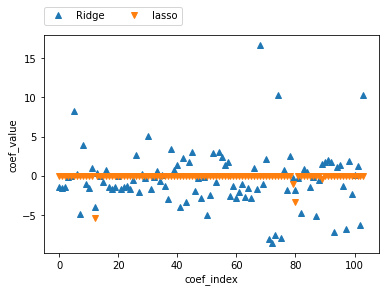

In [26]:
plt.plot(lr1_ridge.coef_,'^',label='Ridge')
plt.plot(lr1_lasso.coef_,'v',label='lasso')
plt.legend(ncol=2,loc=(0,1.05))
plt.xlabel('coef_index')
plt.ylabel('coef_value')

可以发现，Lasso回归的模型大多数系数都为0（当然，这里正则化力度过大，后续需要调整），而Ridge回归的模型几乎没有系数为0。

综上，我们可以得出结论：Lasso回归通过将噪声变量系数（权重）变为0而实现正则化，Ridge回归则通过削减噪声系数实现正则化。也正因为Lasso回归的这一特质，它具有选择特征的功能，当特征数量非常大时，Lasso回归会筛选出重要的特征，因此我们可以先用Lasso回归筛选特征，再使用其他的模型进行下一步的建模。同样地，Lasso回归模型解释起来也比Ridge回归要更容易一些，毕竟Ridge回归中的小权重变量解释起来确实更麻烦一点。

Lasso回归具有可解释性强，可筛选特征的优点；而在预测性能上，Ridge回归往往要优于Lasso回归——这是因为，通过剔除变量来简化模型很容易造成欠拟合，而如果通过降低正则化力度防止欠拟合，又很容易导致筛选掉的特征过少而过拟合。Ridge回归的正则化是“柔和平滑”的，Lasso回归的正则化“剧烈、阶梯式的”。

关于以上结论，我们将在下一小节的实操部分予以体现。

### 2.2.3 Lasso与Ridge的正则化参数调节

正则化参数的调节是模型调参工作中非常重要的一环，因为模型在每个数据集上所需要的正则化力度是不一样的。在特征较少但样本量较大的数据集中，模型可能不会出现过拟合现象，因此未必需要正则化；而在特征数量大的数据集中，我们可能就需要进行一定程度的正则化防止过拟合了。

我们还是以Boston_extended为例，直观地感受不同正则化力度下模型的预测性能表现。

**· Ridge回归的正则化参数调节**

In [34]:
#lr1=LinearRegression().fit(X1_train,y1_train)
#lr1_ridge=Ridge().fit(X1_train,y1_train)
#lr1_lasso=Lasso().fit(X1_train,y1_train)

print('ols的训练集分数：{:.2f}'.format(lr1.score(X1_train,y1_train)))
print('ols的测试集分数：{:.2f}'.format(lr1.score(X1_test,y1_test)))
print('---------------------------------')
print('Ridge的训练集分数：{:.2f}'.format(lr1_ridge.score(X1_train,y1_train)))
print('Ridge的测试集分数：{:.2f}'.format(lr1_ridge.score(X1_test,y1_test)))

ols的训练集分数：0.95205206722781
ols的测试集分数：0.61
---------------------------------
Ridge的训练集分数：0.89
Ridge的测试集分数：0.75


我们看到，ols回归的训练集分数极高，但是测试集分数却显著下降。**训练集分数远高于测试集分数是模型过拟合的典型现象**。而在Ridge回归的训练集分数有所下降，但是测试集分数却显著提升，这说明模型在正则化的作用下变得更加简单，且泛化能力更强。

Ridge回归的正则化力度调整可通过设置参数alpha实现：该参数的默认值为1，取值大于等于0；alpha值越大正则化力度越强，反之越弱。

前面我们默认Ridge的alpha参数为1，显然这未必是一个最佳参数——最佳参数即可能小于1，也可能大于1，我们可以将该参数分别设置为0.1/10，若模型在alpha=0.1时测试集表现更优，说明模型需要降低正则化力度；若alpha=10时更优，说明模型需要增加正则化力度；若它们表现都差于alpha=1，我们便需要以alpha=1为中心，缩小参数搜索范围。

In [37]:
lr1_ridge_01=Ridge(alpha=0.1).fit(X1_train,y1_train)
print('alpha=0.1:')
print('训练集得分：{:.2f}'.format(lr1_ridge_01.score(X1_train,y1_train)))
print('测试集得分：{:.2f}'.format(lr1_ridge_01.score(X1_test,y1_test)))
print('--------------------------------------------')
lr1_ridge_10=Ridge(alpha=10).fit(X1_train,y1_train)
print('alpha=10:')
print('训练集得分：{:.2f}'.format(lr1_ridge_10.score(X1_train,y1_train)))
print('测试集得分：{:.2f}'.format(lr1_ridge_10.score(X1_test,y1_test)))

alpha=0.1:
训练集得分：0.93
训练集得分：0.77
--------------------------------------------
alpha=10:
训练集得分：0.79
训练集得分：0.64


对比发现，alpha调小后的测试集得分有略微上升，而调大后的测试集得分显著下降，说明我们可以尝试基于alpha=1减小alpha以提高泛化性能。具体的选择参数方法将在后续课程专门介绍，这里挖一个小坑，敬请期待！

我们现在可以查看在alpha的不同取值下模型的系数，直观地感受alpha参数是如何影响线性回归模型的。

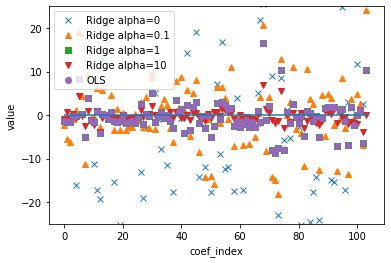

In [42]:
# alpha=0
lr1_ridge_0=Ridge(alpha=0).fit(X1_train,y1_train)

plt.plot(lr1_ridge_0.coef_,'x',label='Ridge alpha=0')
plt.plot(lr1_ridge_01.coef_,'^',label='Ridge alpha=0.1')
plt.plot(lr1_ridge.coef_,'s',label='Ridge alpha=1')
plt.plot(lr1_ridge_10.coef_,'v',label='Ridge alpha=10')
plt.plot(lr1_ridge.coef_,'o',label='OLS')

plt.xlabel('coef_index')
plt.ylabel('value')
plt.hlines(0,0,len(lr1.coef_))
plt.ylim(-25,25)
plt.legend()

上图展示了ols回归以及alpha=0/0.1/1/10下的Ridge回归的系数散点图。不难发现，随着alpha越来越大，各变量的系数越来越靠近0。有趣的是，尽管alpha=0意味着完全没有约束，看上去这好像就是ols回归，但散点图表明两者实际上并不一样，甚至相差非常大！

**· Lasso回归的正则化参数调节**

我们依旧拿ols回归与默认参数(alpha=1)下的Lasso回归作比较。

In [43]:
#lr1=LinearRegression().fit(X1_train,y1_train)
#lr1_ridge=Ridge().fit(X1_train,y1_train)
#lr1_lasso=Lasso().fit(X1_train,y1_train)

print('ols的训练集分数：{:.2f}'.format(lr1.score(X1_train,y1_train)))
print('ols的测试集分数：{:.2f}'.format(lr1.score(X1_test,y1_test)))
print('---------------------------------')
print('Lasso的训练集分数：{:.2f}'.format(lr1_lasso.score(X1_train,y1_train)))
print('Lasso的测试集分数：{:.2f}'.format(lr1_lasso.score(X1_test,y1_test)))

ols的训练集分数：0.95
ols的测试集分数：0.61
---------------------------------
Lasso的训练集分数：0.29
Lasso的测试集分数：0.21


Lasso回归的表现非常令人惊讶——这种**训练集与测试集的得分都非常接近，且都非常低，这是模型欠拟合的典型现象**。Lasso回归具有让特征系数变为0的功能，我们看看alpha=1时究竟有多少个特征不为0.

In [44]:
print('不为0的特征数量为：{}'.format(np.sum(lr1_lasso.coef_!=0)))

不为0的特征数量为：4


有着104个特征的数据集居然只有四个特征被Lasso回归采用，可见在相同的alpha下，Lasso回归的正则化力度远远强于Ridge回归（尽管两者alpha的意义实际上是不同的）。既然模型欠拟合，我们就需要降低alpha，与此同时我们还需要增加参数max_iter的值，该参数是迭代的最大次数。

In [45]:
lr1_lasso_001=Lasso(alpha=0.01,max_iter=100000).fit(X1_train,y1_train)
print('alpha=0.01:')
print('训练集得分：{:.2f}'.format(lr1_lasso_001.score(X1_train,y1_train)))
print('测试集得分：{:.2f}'.format(lr1_lasso_001.score(X1_test,y1_test)))
print('不为0的特征数量为：{}'.format(np.sum(lr1_lasso_001.coef_!=0)))
print('--------------------------------------------')
lr1_lasso_00001=Lasso(alpha=0.0001,max_iter=100000).fit(X1_train,y1_train)
print('alpha=0.001:')
print('训练集得分：{:.2f}'.format(lr1_lasso_00001.score(X1_train,y1_train)))
print('测试集得分：{:.2f}'.format(lr1_lasso_00001.score(X1_test,y1_test)))
print('不为0的特征数量为：{}'.format(np.sum(lr1_lasso_00001.coef_!=0)))

alpha=0.01:
训练集得分：0.90
测试集得分：0.77
不为0的特征数量为：33
--------------------------------------------
alpha=0.001:
训练集得分：0.95
测试集得分：0.64
不为0的特征数量为：96


alpha在等于0.01时训练集与测试集得分显著提高，不为0的特征数量也从4大幅增加到33；但是如果继续设置得太小，测试集得分反而又下降了，不为0的特征数激增至96，正则化效果聊胜于无。

同样地，我们也对不同参数下的Lasso模型系数绘制散点图。

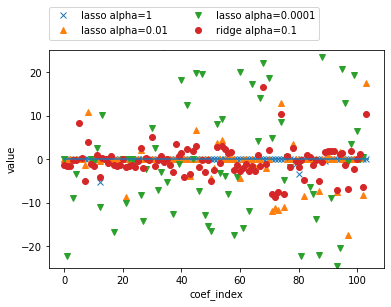

In [48]:
plt.plot(lr1_lasso.coef_,'x',label='lasso alpha=1')
plt.plot(lr1_lasso_001.coef_,'^',label='lasso alpha=0.01')
plt.plot(lr1_lasso_00001.coef_,'v',label='lasso alpha=0.0001')
plt.plot(lr1_ridge.coef_,'o',label='ridge alpha=0.1')

plt.xlabel('coef_index')
plt.ylabel('value')
plt.hlines(0,0,len(lr1.coef_))
plt.ylim(-25,25)
plt.legend(ncol=2,loc=(0,1.05))

当alpha=1时，lasso不仅大部分系数为0，且不为0的系数也非常小（蓝色的x在图中几乎紧紧贴在0轴附近）；alpha=0.01时，我们依旧可以看观察到大部分系数为0（橙色三角形），但是部分index靠后的特征系数已经开始变大，我们有理由猜测这些特征可能是较为重要的特征；当alpha=0.0001时，系数基本上都不为0，且数值普遍非常大。我们还增添了Ridge alpha=0.1作为比较，该模型的性能与lasso alpha=0.01相似，但是两者的特征系数表现却呈现出比较有趣的现象——Ridge的系数几乎都不为0，但是Ridge模型中系数较小的特征，对应的lasso模型下的特征基本上都为0，而Ridge模型中系数较大的特征在lasso模型中的特征也比较大，这说明两者“筛选”出来的特征有许多相似部分。

当然，在这个例子下，我们碰巧发现了lasso alpha=0.01与Ridge alpha=0.1的模型预测性能、特征系数分布是相似的。实际案例中可能不会这么的巧合，考虑到Ridge回归的正则化更加“柔和”，我们在实践中通常首选Ridge回归。